In [12]:
import sys
import os
import matplotlib.pyplot as plt
import tensorflow as tf


# Add the path to the src directory
sys.path.append(os.path.abspath('../src'))



In [13]:
from data_loader import load_datasets


train_ds, val_ds, test_ds = load_datasets()

train_ds.class_names

/Users/donaldaadithiyan/Desktop/ExpressionRecognition/src/../data/raw/images/train
Found 28821 files belonging to 7 classes.
Found 6363 files belonging to 7 classes.
Found 703 files belonging to 7 classes.


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [14]:
len(train_ds), len(val_ds)

(451, 100)

In [15]:
64*len(train_ds), 64*len(val_ds)

(28864, 6400)

In [16]:
for (image, label) in train_ds.take(1):
    print(image.shape, label.shape)
    print(label.numpy())

(64, 48, 48, 3) (64, 7)
[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.

2025-07-26 15:40:42.805755: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
for (image, label) in train_ds.take(1):
    print(len(image[0]))

48


image shape is (48, 48, 3) then:

image[0] → one image of shape (48, 48, 3)

image[0][0] → the first row: shape (48, 3)

image[0][0][0] → the first pixel: shape (3,)

So len(image[0][0]) = 48 (number of pixels in the row)

len(image[0][0][0]) = 3 (number of color channels per pixel)



In [18]:
class_names= train_ds.class_names
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

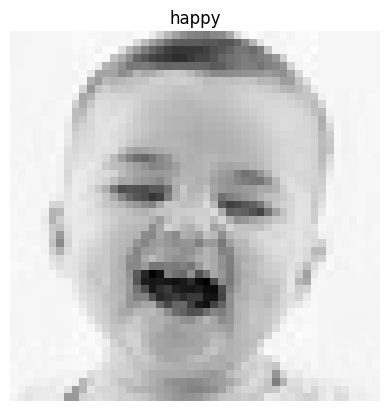

In [19]:



for (image, label) in train_ds.take(1):
    plt.imshow(image[0].numpy().astype("uint8"))
    plt.axis('off')

    class_index = tf.argmax(label[0]).numpy()

    
    plt.title(class_names[class_index])



In [20]:
len(train_ds), len(val_ds), len(test_ds)

(451, 100, 11)

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)